In [86]:
#Bibliotecas necessárias

import pandas as pd
import numpy as np #para manipular os vetores
from sklearn.cluster import KMeans #para usar o KMeans
from fbprophet import Prophet 
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
air = pd.read_csv('AirPassengers.csv')

In [88]:
air['Month'] = pd.to_datetime(air['Month'], infer_datetime_format=True)
indexedDataset = air.set_index(['Month'])

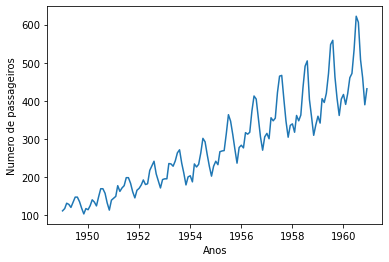

In [89]:
plt.xlabel("Anos")
plt.ylabel("Numero de passageiros")
plt.plot(indexedDataset)
plt.show()

In [90]:
train_dataset= pd.DataFrame()
train_dataset['ds'] = air['Month']
train_dataset['y']= air['Passengers']
train_dataset.head(144)

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [91]:
prophet_basic = Prophet(daily_seasonality=False, weekly_seasonality=False).fit(train_dataset)
future = prophet_basic.make_future_dataframe(periods=24, freq='MS')
future.tail(24)

,ds
144,1961-01-01
145,1961-02-01
146,1961-03-01
147,1961-04-01
148,1961-05-01
149,1961-06-01
150,1961-07-01
151,1961-08-01
152,1961-09-01
153,1961-10-01


In [92]:
forecast = prophet_basic.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
163,1962-08-01,613.355295,585.351244,642.033266
164,1962-09-01,565.304456,537.126130,593.629038
165,1962-10-01,529.623362,502.470524,556.036577
166,1962-11-01,496.694917,468.025767,523.827476
167,1962-12-01,526.248296,499.179264,554.391893


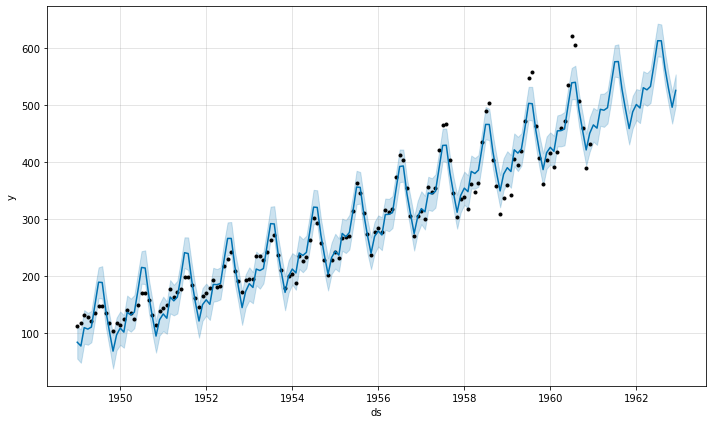

In [93]:
fig1=prophet_basic.plot(forecast)

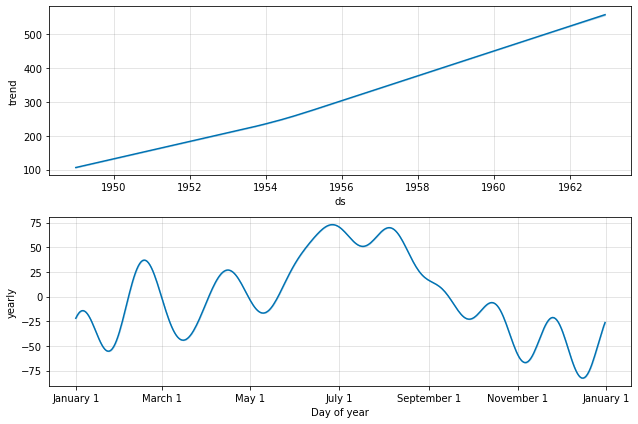

In [94]:
fig2 = prophet_basic.plot_components(forecast)